<a href="https://colab.research.google.com/github/williambrunos/Introduction-To-ML/blob/main/Class_1/Class_1_2/Introduction-To-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão

Regressão é uma classe de problemas voltada tanto para predição de valores futuros de uma determinada grandeza a partir da geração de uma função a partir dos dados obtidos, sendo estes dados tabelados, pois regressão é um tipo de aprendizado de máquina supervisionado.

Além disso, a regressão também pode vir a servir para realizar classificações nos dados, visto que a curva de regressão formada nos dados pode vir a ser utilizada como "fronteira" classificadora.

Construir curvas de regressão sobre os gráficos é de extrema importância para até mesmo entendermos o grau de correlação entre os dados, visto que, se possível traçar uma reta que se encaixe bem nos dados, podemos analisar as correlações a partir do coeficiente angular (ou inclinação) desta reta.

## Tipos de Regressão

### Linear

- Simples: Temos apenas uma variável independente sendo utilizada para predizer valores de variáveis dependentes.

No geral, desejamos encontrar uma equação do tipo:

$$y_i = x_i + \alpha + \epsilon_i$$

Na qual $y_i$ é a variável dependente, $x_i$ a variável independente, $\alpha$ o coeficiente linear da curva e $\epsilon_i$ o erro da predição, todas as grandezas medidas em relação à i-ésima observação.

- Múltipla: Temos mais de uma variável independente sendo utilizadas para predizer valores de variáveis dependentes.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

### Exemplo com Vendas de Sorvetes X Temperatura do dia

In [2]:
temperatura = np.array([30, 25, 36, 18, 25, 29, 30, 33, 37, 31, 26, 37, 29, 26, 30, 31, 34, 38])
vendas_de_sorvete = np.array([20, 12, 50, 10, 18, 25, 26, 32, 48, 22, 16, 52, 24, 20, 28, 29, 35, 40])

In [5]:
df = pd.DataFrame({'Temperature': temperatura, 'Ice_Cream_Sales': vendas_de_sorvete})

In [27]:
df

,Temperature,Ice_Cream_Sales
0,30,20
1,25,12
2,36,50
3,18,10
4,25,18
5,29,25
6,30,26
7,33,32
8,37,48
9,31,22


Agora, vamos analisar os dados a partir de um gráfico de dispersão utilizando o seaborn.

In [9]:
sns.scatterplot?

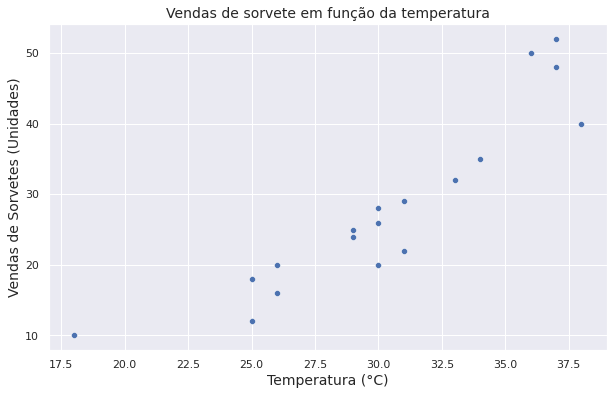

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Vendas de sorvete em função da temperatura', fontsize=14)
plt.ylabel('Vendas de Sorvetes (Unidades)', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=14)
sns.scatterplot(data=df, x='Temperature', y='Ice_Cream_Sales')

Portanto, após uma análise rápida dos dados no gráfico acima, percebemos que há uma dada correlação positiva entre os níveis de temperature e de vendas de sorvete em determinada sorveteria. Ou seja: quanto maiores os valores da temperatura, maiores serão os valores de vendas de sorvetes da sorveteria fictícia.

## Construindo o Modelo de Regressão

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [20]:
X = df['Temperature'].to_numpy()
y = df['Ice_Cream_Sales'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [29]:
model = LinearRegression()

# Transformando os valores em vetores coluna para treinar o modelo
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

y_preds = model.predict(y_test.reshape(-1, 1))

In [32]:
mae = mean_absolute_error(y_test, y_preds)
mae

12.554082078148872

O valor do mean_absolute_error acima representa o erro absoluto entre os valores de **y_test** e **y_preds**, ou seja: o erro médio das predições em relação aos valores reais de teste. Não temos como especificar exatamente se este erro é bom ou ruim, temos apenas a média dos erros absolutos entre os dois vetores de valores: predições e testes. O erro alto se dá por conta talvez da baixa quantidade de dados utilizados para treinar o modelo, incapaz de generalizar totalmente o modelo de regressão. 

## Regressão com statsmodel

Statsmodel é importante para analisar a regressão sob um olhar mais estatístico do modelo, e não apenas acurácia para dados preditos.

In [39]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
houses = pd.read_csv('./sample_data/california_housing_train.csv')
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [44]:
X = houses.drop('median_house_value', axis=1)
y = houses['median_house_value']

In [46]:
model = sm.OLS(y, X)
ans = model.fit()

In [48]:
print(ans.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.927e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        21:37:24   Log-Likelihood:                     -2.1492e+05
No. Observations:               17000   AIC:                                  4.298e+05
Df Residuals:                   16992   BIC:                                  4.299e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Agora, fazendo o mesmo processo, mas já normalizando os valores das colunas em X:

$$normalized_i = \frac{X_i - \mu}{\sigma}$$

onde $normalized$ é o dado de uma célula do dataframe normalizado, $X_i$ é o dado da i-ésima observação a ser normalizado, $\mu$ é a média aritmética dos valores da coluna da célula e $\sigma$ é o desvio padrão da mesma.

In [49]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
normalized_X = scaler.fit_transform(X)
normalized_X = pd.DataFrame(normalized_X, columns=X.columns) 

model = sm.OLS(y, normalized_X)
ans = model.fit()
print(ans.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.152
Method:                 Least Squares   F-statistic:                              383.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        21:46:22   Log-Likelihood:                     -2.3314e+05
No. Observations:               17000   AIC:                                  4.663e+05
Df Residuals:                   16992   BIC:                                  4.664e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

**array([-86798.24747078, -91860.69960312,  15032.57025439, -18287.63429728,
        50207.48120052, -41862.70752333,  14627.59247609,  76807.404793  ])**

## Regressão com Scikit-Learn

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [62]:
modelo = LinearRegression()

normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
normalized_X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

modelo.fit(normalized_X_train, y_train)
predictions = modelo.predict(normalized_X_test)

mae = mean_absolute_error(y_test, predictions)
print(mae)

50391.27647167605


In [60]:
modelo.coef_ # Comparar com o do statsmodel

array([-86798.24747078, -91860.69960312,  15032.57025439, -18287.63429728,
        50207.48120052, -41862.70752333,  14627.59247609,  76807.404793  ])